In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import sys
sys.path.append('../dataloader/')
import dataloader


In [10]:
df  = dataloader.DataLoader()

In [103]:
data = df.load_data(2)

../dataloader/dataloader.py:75: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  self.hits[['next_mod_id', 'connecting_layer_id']] = self.hits.groupby('particle_id')['discrete_module_id', 'unique_layer_id'].shift(-1)


In [110]:
data[(data['z']==81.75) & (data['r']==3.8887787)].squeeze()

hit_id                 4.975400e+04
x                      3.888350e+00
y                     -5.775430e-02
z                      8.175000e+01
r                      3.888779e+00
layer_id               6.000000e+00
volume_id              9.000000e+00
module_id              5.200000e+01
phi                   -1.485207e-02
particle_id            2.251928e+17
pt                     5.436137e-01
nhits                  1.300000e+01
discrete_module_id     3.515000e+03
Unnamed: 0             3.000000e+01
unique_layer_id        2.000000e+01
next_mod_id            3.518000e+03
connecting_layer_id    2.000000e+01
Name: 10830, dtype: float64

In [41]:
data[(data['z']==110.19999695) & data['r']==4.59792471]

,hit_id,x,y,z,r,layer_id,volume_id,module_id,phi,particle_id,pt,nhits,discrete_module_id,Unnamed: 0,unique_layer_id,next_mod_id,connecting_layer_id


In [65]:
a = np.array([1,1, 1, 2])

In [66]:
len(np.where(a==1)[0])

3

In [67]:
-0.0 == 0 

True

In [97]:
t[t['hit_id']==12762].index[0]

0

In [85]:
t = data[data['particle_id']== 6.305279998165811e+16]

In [102]:
t[t['r'] > 8]

,hit_id,x,y,z,r,layer_id,volume_id,module_id,phi,particle_id,pt,nhits,discrete_module_id,Unnamed: 0,unique_layer_id,next_mod_id,connecting_layer_id
30353,11468,0.734260,8.287140,-69.800003,8.319605,12,7,79,1.482425,6.305280e+16,0.233724,7,618,26,12.0,5131.0,5.0
55912,64979,9.330410,24.567600,-85.300003,26.279718,2,13,108,1.207837,6.305280e+16,0.233724,7,5131,7,5.0,5957.0,6.0
61428,71406,17.209801,31.477701,-94.031998,35.875099,4,13,94,1.070467,6.305280e+16,0.233724,7,5957,8,6.0,4957.0,25.0
74680,64042,48.411400,36.860901,-121.849998,60.847267,12,12,104,0.650763,6.305280e+16,0.233724,7,4957,40,25.0,12181.0,39.0
79417,97022,76.094704,-9.605400,-179.449997,76.698547,8,16,48,-0.125565,6.305280e+16,0.233724,7,12181,52,39.0,12179.0,39.0


In [93]:
t.iloc[0].index

Index(['hit_id', 'x', 'y', 'z', 'r', 'layer_id', 'volume_id', 'module_id',
       'phi', 'particle_id', 'pt', 'nhits', 'discrete_module_id', 'Unnamed: 0',
       'unique_layer_id', 'next_mod_id', 'connecting_layer_id'],
      dtype='object')

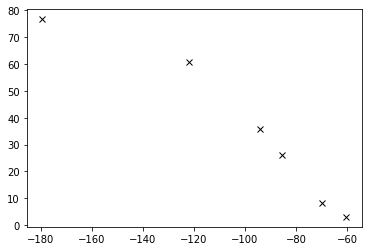

In [89]:
plt.plot(t.z, t.r, "kx")

In [37]:
#ep0_all_accuracy = pd.read_csv('/home/lhv14/Downloads/trackml_numClose0_allHits_accuracy.csv')
#ep0_all_reward = pd.read_csv('/home/lhv14/Downloads/trackml_numClose0_allHits_reward.csv')

#ep10_all_accuracy = pd.read_csv('/home/lhv14/Downloads/trackml_numClose10_allHits_accuracy.csv')
#ep10_all_reward = pd.read_csv('/home/lhv14/Downloads/trackml_numClose10_allHits_reward.csv')
#ep5 = pd.read_csv('/home/lhv14/Downloads/tensboard_single_5hits_episodic.csv')
#ep20 = pd.read_csv('/home/lhv14/Downloads/tensboard_single_20hits_episodic_longer.csv')

ep0_all_accuracy = pd.read_csv('/home/lhv14/Downloads/cms_noPU_numClose10_allHits_accuracy.csv')
ep0_all_reward = pd.read_csv('/home/lhv14/Downloads/cms_noPU_numClose10_allHits_reward.csv')
ep10_all_accuracy = pd.read_csv('/home/lhv14/Downloads/trackml_sample_accuracy.csv')
ep10_all_reward = pd.read_csv('/home/lhv14/Downloads/trackml_sample_reward.csv')

In [17]:
!ls /home/lhv14/Downloads/trackml_numClose10*

/home/lhv14/Downloads/trackml_numClose10_allHits_accruacy.csv
/home/lhv14/Downloads/trackml_numClose10_allHits_reward.csv


In [21]:
plt.rcParams.update({'font.size': 16})

Text(0, 0.5, 'average accuracy 40 episodes')

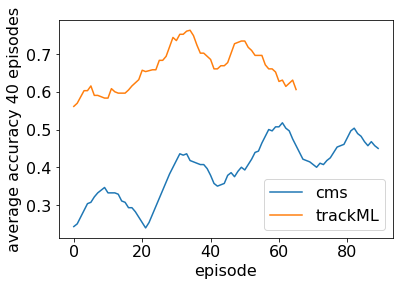

In [38]:
window_size = 40
windows_ep0_all_accuracy = ep0_all_accuracy.Value.rolling(window_size)
windows_ep0_all_reward = ep0_all_reward.Value.rolling(window_size)
windows_ep10_all_accuracy = ep10_all_accuracy.Value.rolling(window_size)
windows_ep10_all_reward = ep10_all_reward.Value.rolling(window_size)
# Create a series of moving
# averages of each window
moving_averages_ep0_all_accuracy = windows_ep0_all_accuracy.mean().dropna()
moving_averages_ep0_all_reward = windows_ep0_all_reward.mean().dropna()
moving_averages_ep10_all_accuracy = windows_ep10_all_accuracy.mean().dropna()
moving_averages_ep10_all_reward = windows_ep10_all_reward.mean().dropna()
#moving_averages_ep20 = windows_ep20.mean().dropna()

plt.plot(range(len(moving_averages_ep0_all_accuracy)), moving_averages_ep0_all_accuracy, label='cms')
plt.plot(range(len(moving_averages_ep10_all_accuracy)), moving_averages_ep10_all_accuracy, label='trackML')

#plt.plot(range(len(moving_averages_ep0_all_reward)), moving_averages_ep0_all_reward, label='reward closest')
#plt.plot(range(len(moving_averages_ep20)), moving_averages_ep20, label='20 closest')
plt.legend()
plt.xlabel('episode')
plt.ylabel('average accuracy 40 episodes')

Text(0, 0.5, 'average reward 40 episodes')

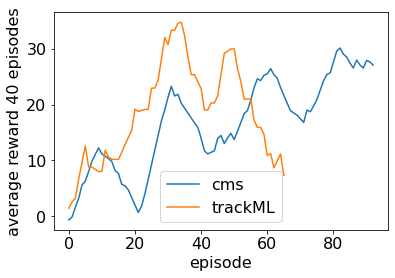

In [39]:
plt.plot(range(len(moving_averages_ep0_all_reward)), moving_averages_ep0_all_reward, label='cms')
plt.plot(range(len(moving_averages_ep10_all_reward)), moving_averages_ep10_all_reward, label='trackML')

plt.legend()
plt.xlabel('episode')
plt.ylabel('average reward 40 episodes')

In [117]:
# Get the window of series
# of observations of specified window size
window_size = 100
windows = ep0.Value.rolling(window_size)
  
# Create a series of moving
# averages of each window
moving_averages = windows.mean()
  

In [120]:
t = moving_averages.dropna()

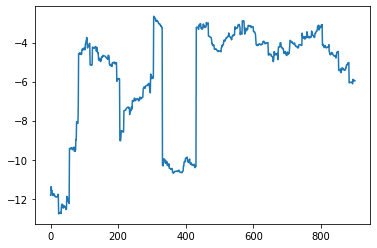

In [122]:
plt.plot(range(len(t)), t)

In [174]:
output = pd.read_csv('../evaluation/garage_outputs.csv')

In [151]:
s = output.groupby('particle_id').count() -2

In [154]:
np.mean(s.filenumber)

6.46901917199222

In [163]:
ep0

,Wall time,Step,Value
0,1.662450e+09,0,-1.596175
1,1.662450e+09,1,0.000000
2,1.662450e+09,2,-8.656883
3,1.662450e+09,3,-0.142864
4,1.662450e+09,4,-2.499727
...,...,...,...
770,1.662451e+09,770,-1.065974
771,1.662451e+09,771,-58.157265
772,1.662451e+09,772,-1.000250
773,1.662451e+09,773,-41.495998


In [183]:
end = output.iloc[-200:]

In [184]:
len(end[end['reward']==10])/200

0.06